In [2]:
import os
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import clip
from collections import OrderedDict
import torch
import skimage
import cv2

In [3]:
model, preprocess = clip.load("ViT-B/32")

In [62]:
microwave = './examples/micro.mp4'
kettle = './examples/kettle.mp4'
light = './examples/light_switch.mp4'
slide_cabinet = './examples/slide_cabinet.mp4'
hinge_cabinet = './examples/hinge_cabinet.mp4'
bottom_burner = './examples/bottom_burner.mp4'
top_burner = './examples/top_burner.mp4'

In [65]:
def get_frames(task, show_matrix=True):
    frames = []
    video_cv2 = cv2.VideoCapture(task)
    current_frame = 0
    while video_cv2.isOpened():
        ret, frame = video_cv2.read()
        if ret == True:
            frames.append(Image.fromarray(frame[:, :, ::-1]))
        else:
            break
        current_frame += 1
        video_cv2.set(cv2.CAP_PROP_POS_FRAMES, current_frame)

    print(f"Frames extracted: {len(frames)}")

    image_input = torch.tensor(np.stack(frames)).cuda()

    with torch.no_grad():
        image_features = model.encode_image(image_input).float()
    
    similarity = []
    image_features /= image_features.norm(dim=-1, keepdim=True)
    similarity = np.dot(image_features.cpu().numpy(), image_features.cpu().numpy().T)
    
    if show_matrix:
        count = len(image_features)

        plt.figure(figsize=(20, 14))
        plt.imshow(similarity)
        # plt.colorbar()
        # plt.yticks(range(count), similarity, fontsize=18)
        # plt.xticks([])
        # for x in range(similarity.shape[1]):
            # for y in range(similarity.shape[0]):
                # plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

        for side in ["left", "top", "right", "bottom"]:
            plt.gca().spines[side].set_visible(True)

        plt.xlim([-0.5, count - 0.5])
        plt.ylim([count + 0.5, -2])

        plt.title("Cosine similarity between image features", size=20)

        for side in ["left", "top", "right", "bottom"]:
            plt.gca().spines[side].set_visible(True)

        plt.xlim([-0.5, count - 0.2])
        plt.ylim([count + 1, -2])

In [66]:
get_frames(kettle, show_matrix=True)

Frames extracted: 70


RuntimeError: CUDA out of memory. Tried to allocate 986.00 MiB (GPU 0; 5.81 GiB total capacity; 3.80 GiB already allocated; 665.06 MiB free; 3.83 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

(65.0, -2.0)

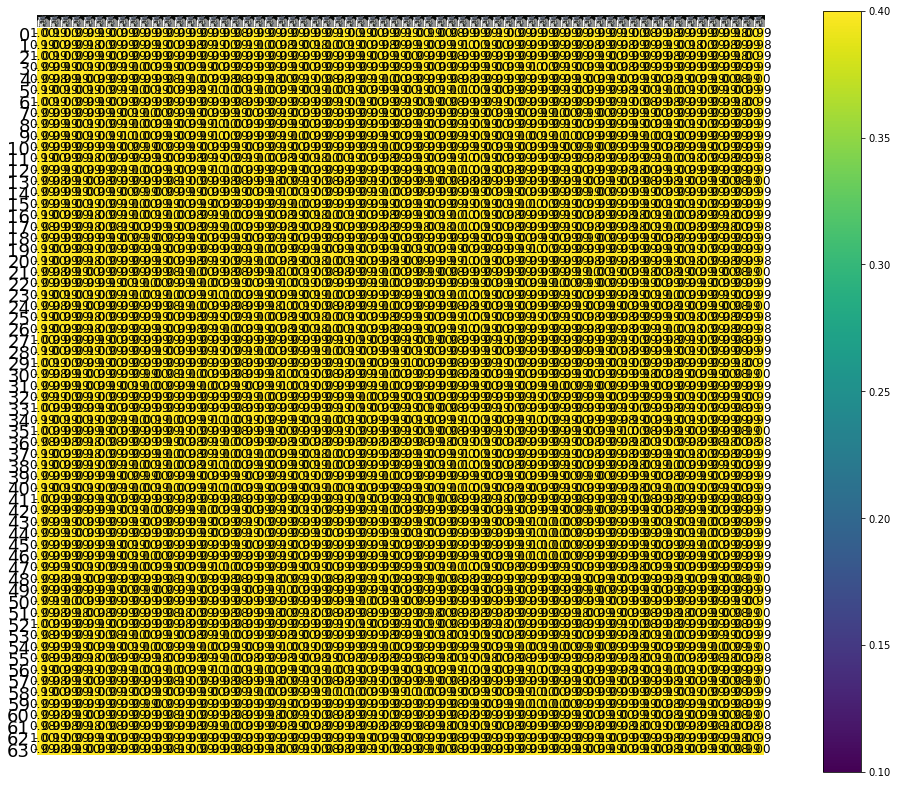

In [10]:
count = len(image_features)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.6)
plt.colorbar()
plt.yticks(range(count),fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(True)

plt.xlim([-0.5, count - 0.2])
plt.ylim([count + 1, -2])